In [106]:
import pandas as pd
import json
import seaborn as sns
import datetime as dt
import matplotlib.pyplot as plt
import scipy.stats as st

In [89]:
data = pd.read_csv("us events ad_revenue filtered 03.02-07.02.csv")
data.head()

,profile_id,os_version,device_manufacturer,device_model,device_type,device_locale,event_name,event_json,event_datetime,event_timestamp,event_receive_datetime,event_receive_timestamp,connection_type,operator_name,country_iso_code,city
0,JLjpGzDHBQm,11,Samsung,Galaxy Tab S6,tablet,en_US,c_ad_revenue,"{""ad_type"":""banner"",""placement"":"""",""view_index...",2022-02-04 20:02:28,1643994148,2022-02-06 17:58:19,1644159499,wifi,NaN,US,Norwalk
1,JLjpGzDHBQm,11,Samsung,Galaxy Tab S6,tablet,en_US,c_ad_revenue,"{""ad_type"":""banner"",""placement"":"""",""view_index...",2022-02-04 20:02:45,1643994165,2022-02-06 17:58:19,1644159499,wifi,NaN,US,Norwalk
2,JLkVacrzHY6,11,Google,Pixel 2,phone,en_US,c_ad_revenue,"{""ad_type"":""banner"",""placement"":"""",""view_index...",2022-02-05 17:53:05,1644072785,2022-02-06 16:59:29,1644155969,wifi,Verizon,US,Charlotte
3,JMC6wG3cX0f,10,Samsung,Galaxy S9,phone,en_US,c_ad_revenue,"{""ad_type"":""int"",""placement"":""next_level"",""vie...",2022-02-06 17:09:01,1644156541,2022-02-06 17:09:24,1644156564,wifi,T-Mobile,US,Cocoa
4,JLzWWTJfi1b,10,Samsung,Galaxy S9,phone,en_US,c_ad_revenue,"{""ad_type"":""banner"",""placement"":"""",""view_index...",2022-02-06 17:15:38,1644156938,2022-02-06 17:16:16,1644156976,cell,Verizon,US,NaN


In [90]:
ad_type = []
revenue = []
eCPM = []
for i in range(0, len(data["event_json"])):
    ad_type.append(json.loads(data["event_json"][i])["ad_type"])
    revenue.append(json.loads(data["event_json"][i])["revenue"])
    eCPM.append(json.loads(data["event_json"][i])["revenue"] * 1000)
data["ad_type"]  = ad_type
data["revenue"]  = revenue  
data["eCPM"] = eCPM

# 1a. Для каждого формата рекламы построим распределение средних eCPM-ов юзеров:

In [4]:
banner_eCPM = data[data.ad_type == "banner"].groupby("profile_id").aggregate({"eCPM":"mean"})
int_eCPM = data[data.ad_type == "int"].groupby("profile_id").aggregate({"eCPM":"mean"})
rv_eCPM = data[data.ad_type == "rv"].groupby("profile_id").aggregate({"eCPM":"mean"})

df = pd.DataFrame({"banner": banner_eCPM["eCPM"], 
                   "int": int_eCPM["eCPM"], 
                   "rv": rv_eCPM["eCPM"]})

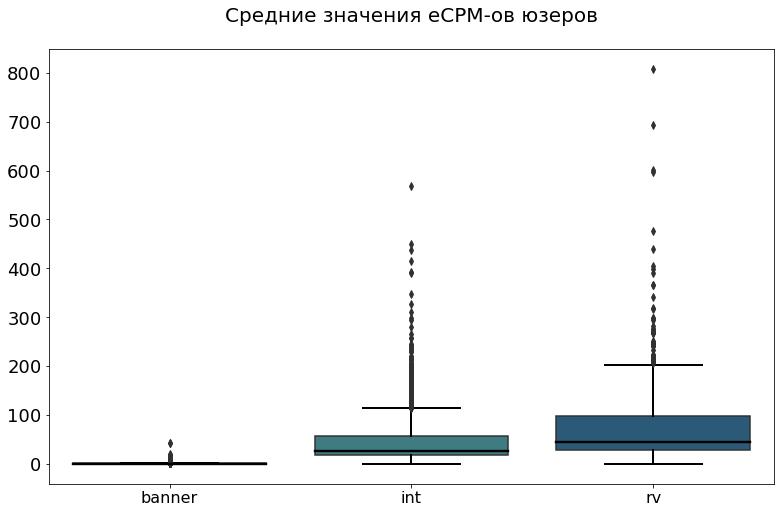

In [5]:
def boxplot(df, title_name, color):
    boxprops = dict(linewidth = 3, color = "b")
    medianprops = dict(linewidth = 2.4, color = "k")
    capprops = dict(linewidth = 2, color = "k")
    whiskerprops = dict(linewidth = 2, color = "k")

    plt.figure(figsize=(13, 8))
    profile_eCPM = sns.boxplot(data = df, palette = color, medianprops=medianprops, capprops=capprops, whiskerprops=whiskerprops)
    plt.xticks(fontsize = 16)
    plt.yticks(fontsize = 18)
    plt.title(title_name, fontsize = 20, pad = 27)

    plt.show()
    
boxplot(df, title_name = "Средние значения eCPM-ов юзеров", color = "crest")

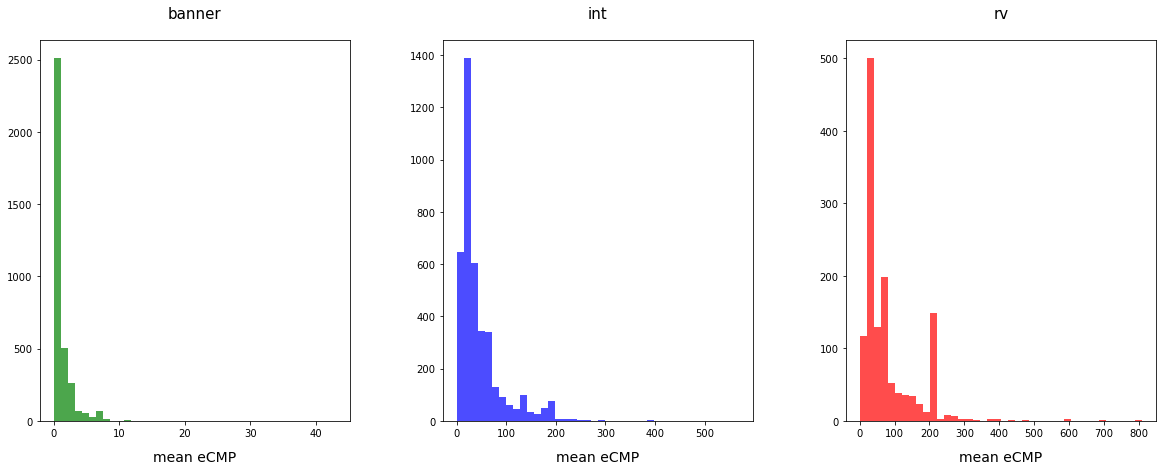

In [6]:
def histplot(df, name, bins):
    fig, axes = plt.subplots(nrows = 1, ncols = 3, figsize = (20, 7))

    axes[0].hist(df["banner"], alpha = 0.7, bins = bins, color = "green")
    axes[0].set_xlabel(name, fontsize = 14, labelpad = 12)
    axes[0].set_title("banner", fontsize = 15, pad = 22)

    axes[1].hist(df["int"], alpha = 0.7, bins = bins, color = "blue")
    axes[1].set_xlabel(name, fontsize = 14, labelpad = 12)
    axes[1].set_title("int", fontsize = 15, pad = 22)

    axes[2].hist(df["rv"], alpha = 0.7, bins = bins, color = "red")
    axes[2].set_xlabel(name, fontsize = 14, labelpad = 12)
    axes[2].set_title("rv", fontsize = 15, pad = 22)

    plt.subplots_adjust(wspace = 0.3, hspace = 0.4)
    plt.show()
histplot(df, name = "mean eCMP", bins = 40)  

### На данных графиках можно заметить, что наибольшие значения и распределение средних  дохода за 1000 просмотров для юзеров принимают видео, которое юзер смотрит по желанию и за просмотр получает монетки или другие ресурсы. Данный тип рекламы является наиболее просматриваемым отдельными уникальными юзерами. Далее среднее значение принимает полноэкранная реклама, самые минимальные значения среди всех принимают значения для банерной рекламы. У распредений для рекламных видео за бонусы и полноэкранной рекламы имеются наиболее сильный выбросы. Средние значения eCMP для баннерной рекламы принимают не такой большой диапазон значений.
### Однако если смотреть на количество пользователей, которые просматривают рекламу, то получается, что наименьшее количество пользователей смотрит видео за бонусы, но они делают это гораздо в больших количествах, тогда как средние значения еCMP для баннерной рекламы самые низкие и распределение значений небольшое, но количество уникальных юзеров, которые просматривают данную рекламу превышает количество в остальных двух группах.

# 2b. Для каждого формата рекламы отобразим средние eCPM-ы по городам и  версиям ОС

## Средние eCPM по городам:

In [11]:
banner_eCPM_city = data[data.ad_type == "banner"].groupby("city").aggregate({"eCPM":"mean"})
int_eCPM_city = data[data.ad_type == "int"].groupby("city").aggregate({"eCPM":"mean"})
rv_eCPM_city = data[data.ad_type == "rv"].groupby("city").aggregate({"eCPM":"mean"})

df_city = pd.DataFrame({"banner": banner_eCPM_city["eCPM"], 
                   "int": int_eCPM_city["eCPM"], 
                   "rv": rv_eCPM_city["eCPM"]})

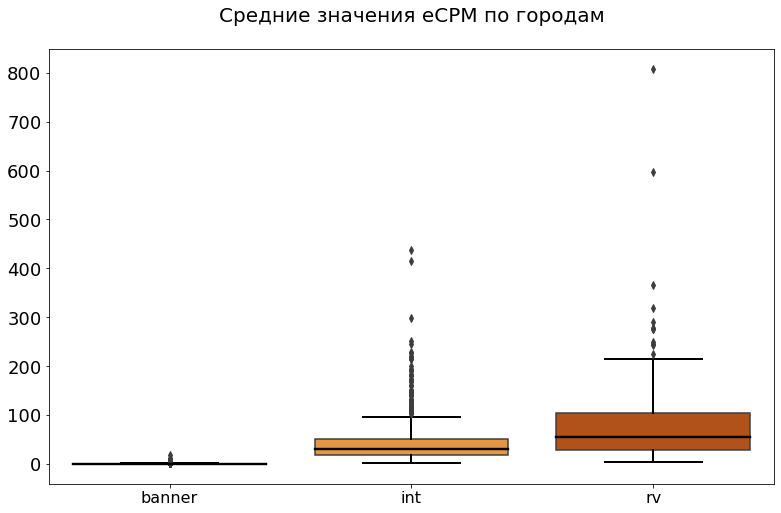

In [12]:
boxplot(df_city, title_name = "Средние значения eCPM по городам", color = "YlOrBr")

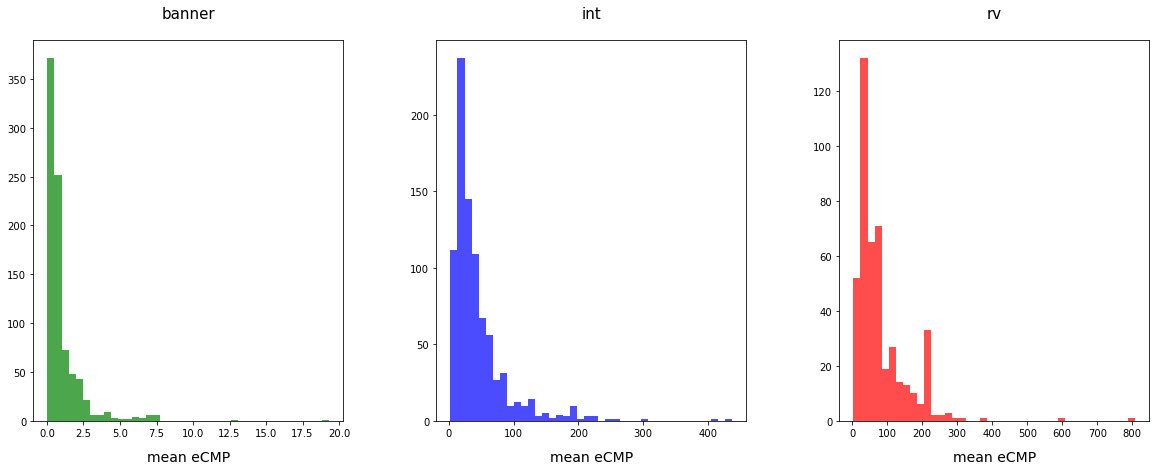

In [13]:
histplot(df_city, name = "mean eCMP", bins = 40)

### По гистограммам можно увидеть, что распределение отличается от нормально, дополнительно проведем проверку на нормальность критерием Шапиро-Уилкса

In [302]:
print(st.shapiro(banner_eCPM_city["eCPM"]))
print(st.shapiro(int_eCPM_city["eCPM"]))
print(st.shapiro(rv_eCPM_city["eCPM"]))

ShapiroResult(statistic=0.5578533411026001, pvalue=7.157832555771166e-42)
ShapiroResult(statistic=0.6878162622451782, pvalue=3.28203628840271e-37)
ShapiroResult(statistic=0.7232918739318848, pvalue=9.459250373804596e-27)


### pvalue < 0.01, данные распределены не нормально. Сравним средние eCMP по городам в трех группах с помощью теста Манна-Уитни

In [252]:
print(st.mannwhitneyu(df_city["banner"], df_city["int"]))
print(st.mannwhitneyu(df_city["banner"], df_city["rv"]))
print(st.mannwhitneyu(df_city["int"], df_city["rv"]))

MannwhitneyuResult(statistic=58285.0, pvalue=2.5779688295890337e-225)
MannwhitneyuResult(statistic=46755.0, pvalue=1.2593436004989384e-239)
MannwhitneyuResult(statistic=154941.0, pvalue=7.685711444417764e-123)


### p-value < 0.01, значит по результатам данного теста есть статистические различия между всеми тремя группами.

## Средние eCPM по OS:

In [14]:
banner_eCPM_os = data[data.ad_type == "banner"].groupby("os_version").aggregate({"eCPM":"mean"})
int_eCPM_os = data[data.ad_type == "int"].groupby("os_version").aggregate({"eCPM":"mean"})
rv_eCPM_os = data[data.ad_type == "rv"].groupby("os_version").aggregate({"eCPM":"mean"})

df_os = pd.DataFrame({"banner": banner_eCPM_os["eCPM"], 
                   "int": int_eCPM_os["eCPM"], 
                   "rv": rv_eCPM_os["eCPM"]})

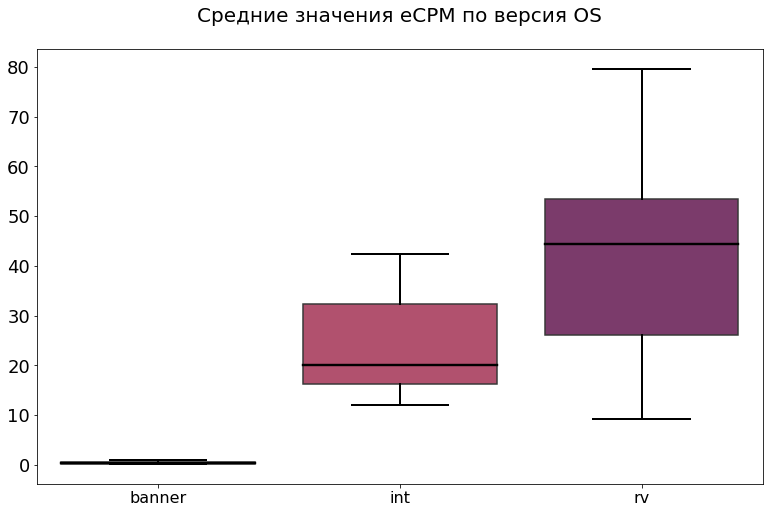

In [15]:
boxplot(df_os, title_name = "Средние значения eCPM по версия OS", color = "flare")

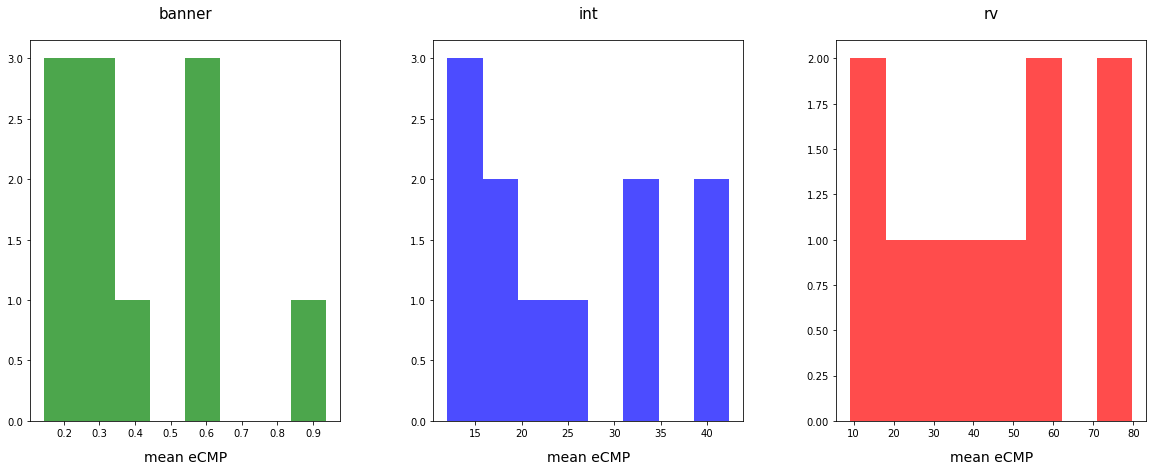

In [16]:
histplot(df_os, name = "mean eCMP", bins = 8)

### Проведем проверку на нормальность критерием Шапиро-Уилкса

In [31]:
print(st.shapiro(banner_eCPM_os["eCPM"]))
print(st.shapiro(int_eCPM_os["eCPM"]))
print(st.shapiro(rv_eCPM_os["eCPM"]))

ShapiroResult(statistic=0.8831230401992798, pvalue=0.11397145688533783)
ShapiroResult(statistic=0.9125474691390991, pvalue=0.2613564133644104)
ShapiroResult(statistic=0.9385619163513184, pvalue=0.537125825881958)


### pvalue > 0.05, данные распределены  нормально. Сравним средние eCMP по городам в трех группах с помощью t-теста

In [32]:
print(st.ttest_ind(banner_eCPM_os["eCPM"], int_eCPM_os["eCPM"], equal_var=False))
print(st.ttest_ind(banner_eCPM_os["eCPM"], rv_eCPM_os["eCPM"], equal_var=False))
print(st.ttest_ind(int_eCPM_os["eCPM"], rv_eCPM_os["eCPM"], equal_var=False))

Ttest_indResult(statistic=-7.441309873963203, pvalue=2.1951768322071374e-05)
Ttest_indResult(statistic=-5.54408380354582, pvalue=0.00035893805012440224)
Ttest_indResult(statistic=-2.251309328870577, pvalue=0.04376338486616848)


In [33]:
print(st.ttest_ind(int_eCPM_os["eCPM"], rv_eCPM_os["eCPM"], equal_var=False)[1])

0.04376338486616848


### p-value < 0.05 между группой с баннерной рекламой и с группами с видео за бонусы и полноэкранной рекламой

# 1c. Отобразим суммарные доходы по городам и версиям ОС

## Суммарные доходы по городам

In [34]:
banner_rev_city = data[data.ad_type == "banner"].groupby("city").aggregate({"revenue":"sum"})
int_rev_city = data[data.ad_type == "int"].groupby("city").aggregate({"revenue":"sum"})
rv_rev_city = data[data.ad_type == "rv"].groupby("city").aggregate({"revenue":"sum"})

df_city_rev = pd.DataFrame({"banner": banner_rev_city["revenue"], 
                   "int": int_rev_city["revenue"], 
                   "rv": rv_rev_city["revenue"]})

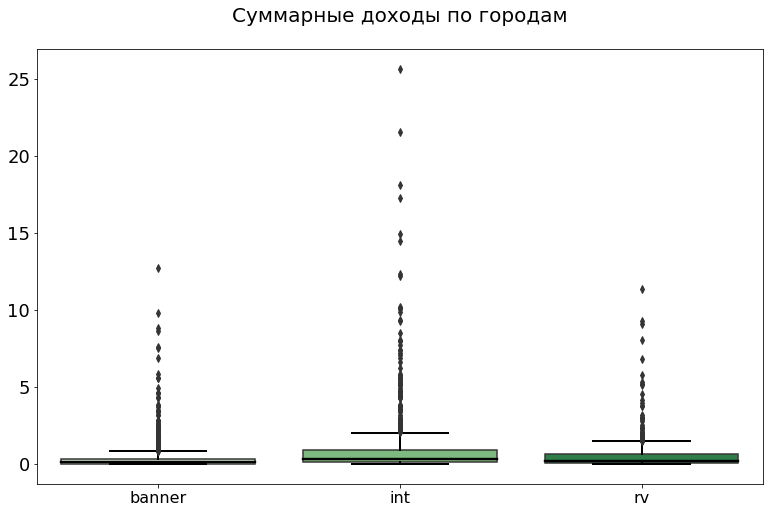

In [35]:
boxplot(df_city_rev, title_name = "Суммарные доходы по городам", color = "Greens")

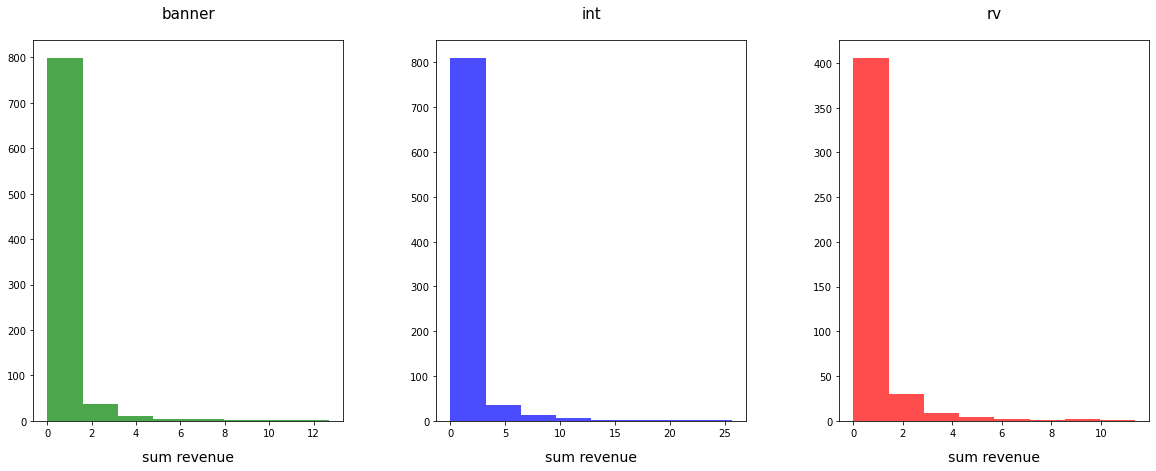

In [39]:
histplot(df_city_rev, name = "sum revenue", bins = 8)

### На гистограммах и боксплотах мы видим приблизительно одинаковое значение медиан для всех трех групп, а также наибольшее количество равномерных выбросов в группе с полноэкранной рекламой. 

### Cуммарные доходы по версиям ОС

In [41]:
banner_rev_os = data[data.ad_type == "banner"].groupby("os_version").aggregate({"revenue":"sum"})
int_rev_os = data[data.ad_type == "int"].groupby("os_version").aggregate({"revenue":"sum"})
rv_rev_os = data[data.ad_type == "rv"].groupby("os_version").aggregate({"revenue":"sum"})

df_os_rev = pd.DataFrame({"banner": banner_rev_os["revenue"], 
                   "int": int_rev_os["revenue"], 
                   "rv": rv_rev_os["revenue"]
                           })

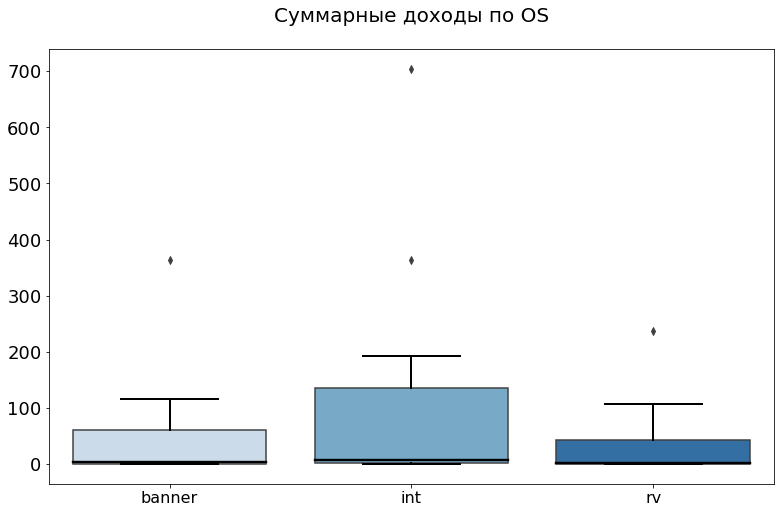

In [42]:
boxplot(df_os_rev, title_name = "Суммарные доходы по OS", color = "Blues")

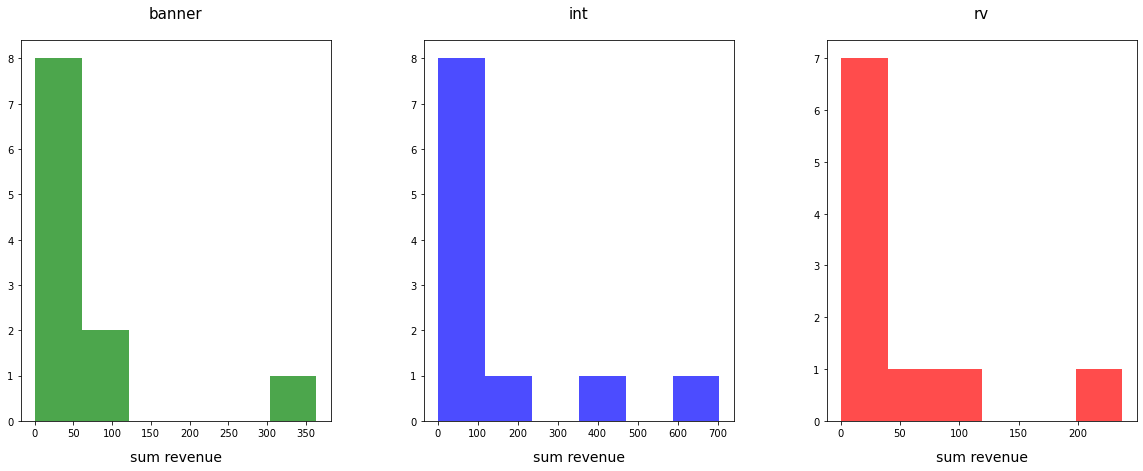

In [44]:
histplot(df_os_rev, name = "sum revenue", bins = 6)

### На гистограммах и боксплотах мы видим приблизительно одинаковое значение медиан для всех трех групп, а также наибольшее количество равномерных выбросов в группе с полноэкранной рекламой. 

# 2. Учесть статистическую значимость для п.1b 

## Статистика по городам

In [47]:
len(data["city"].unique())

921

### Всего в датасете находится 921 уникальное значение названия городов. Так как проводить попарное сравнение между всеми группами будет сложно, приведем примерное описание количественных характеристик по eCMP

### Для баннерной рекламы:

In [53]:
city = data[data.ad_type == "banner"].groupby("city").aggregate({"eCPM":"max"})
print(city.sort_values(by="eCPM", ascending=False))

                   eCPM
city                   
Pittsburgh    43.021387
Duluth        41.421806
Corbin        34.321960
Jersey City   31.966212
Santa Rosa    28.423479
...                 ...
Strongsville   0.085758
Hartford       0.085130
Federal Way    0.054583
Waukesha       0.044964
Anderson       0.030573

[856 rows x 1 columns]


### Как мы видим, максимальные значения доходов за 1000 просмотров для баннерной рекламы принадлежат таким городам, как: Pittsburgh, Duluth, Corbin
### Минимальные значения доходов за 1000 просмотров для баннерной рекламы у городов Federal Way, Waukesha, Anderson. 
### Мы можем посмотреть есть ли статистически значимые различия между городами с максимальным значением eCMP. Для начала проверим нормальность распределения с помощью критерия Шапиро-Уилкса


In [55]:
city1 = data[(data['city']== "Pittsburgh") & (data['ad_type'] == "banner")]
city2 = data[(data['city']== "Duluth") & (data['ad_type'] == "banner")]
city3 = data[(data['city']== "Corbin") & (data['ad_type'] == "banner")]
print(st.shapiro(city1['eCPM']))
print(st.shapiro(city2['eCPM']))
print(st.shapiro(city3['eCPM']))

ShapiroResult(statistic=0.3531424403190613, pvalue=0.0)
ShapiroResult(statistic=0.32497090101242065, pvalue=3.016871438647392e-38)
ShapiroResult(statistic=0.6704800724983215, pvalue=2.5184734298022704e-08)


### Данные распределены не нормально, поэтому используем критерий Манна-Уитни

In [56]:
print(st.mannwhitneyu(city1['eCPM'], city2['eCPM']))
print(st.mannwhitneyu(city1['eCPM'], city3['eCPM']))
print(st.mannwhitneyu(city2['eCPM'], city3['eCPM']))

MannwhitneyuResult(statistic=409993.0, pvalue=9.108951850493353e-74)
MannwhitneyuResult(statistic=18785.0, pvalue=1.1706024422643615e-16)
MannwhitneyuResult(statistic=5359.0, pvalue=9.50169178131963e-07)


### p-value < 0.01, значит между тремя городами есть статистически значимое различие по значению eCPM и  максимальные значения доходов за 100 просмотров принадлежат юзерам из города Pittsburgh

### Для полноэкранной рекламы

In [57]:
city = data[data.ad_type == "int"].groupby("city").aggregate({"eCPM":"max"})
print(city.sort_values(by="eCPM", ascending=False))

                         eCPM
city                         
San Antonio        937.195984
Milwaukee          921.145020
La Crosse          650.000000
Madisonville       641.958862
East Peoria        582.154785
...                       ...
Federal Way          5.539932
Fort Walton Beach    4.278135
Lincoln City         4.249154
Ocala                2.926826
Chantilly            2.890648

[869 rows x 1 columns]


### Максимальные значения доходов за 1000 просмотров для баннерной рекламы принадлежат таким городам, как: San Antonio, Milwaukee
### Минимальные значения доходов за 1000 просмотров для баннерной рекламы у городов Federal Way, Ocala, Chantilly. 
### Мы также можем посмотреть есть ли статистически значимые различия между городами с максимальным значением eCMP. 

In [58]:
city1 = data[(data['city']== "Pittsburgh") & (data['ad_type'] == "int")]
city2 = data[(data['city']== "Duluth") & (data['ad_type'] == "int")]
print(st.shapiro(city1['eCPM']))
print(st.shapiro(city2['eCPM']))

ShapiroResult(statistic=0.6495746374130249, pvalue=1.0963570745990883e-19)
ShapiroResult(statistic=0.8674317598342896, pvalue=0.0007041144999675453)


### Данные распределены не нормально, используем критерий Манна-Уитни

In [59]:
print(st.mannwhitneyu(city1['eCPM'], city2['eCPM']))

MannwhitneyuResult(statistic=1270.5, pvalue=7.048308774092482e-09)


### Данные города статистически отличаются друг от друга, максимальные значения доходов за 100 просмотров принадлежат юзерам из города San Antonio. 

### Для видео, которое юзер смотрит по желанию и за просмотр ачивки

In [60]:
city = data[data.ad_type == "rv"].groupby("city").aggregate({"eCPM":"max"})
print(city.sort_values(by="eCPM", ascending=False))

                         eCPM
city                         
East Peoria        916.205811
Lee's Summit       915.771301
Indianapolis       740.319702
Cincinnati         622.153137
Rocky Mount        619.201782
...                       ...
Prescott Valley     10.761116
Uniontown            9.083504
Oak Creek            5.105076
Utica                4.088939
Fort Walton Beach    4.074518

[454 rows x 1 columns]


### Максимальные значения доходов за 1000 просмотров для баннерной рекламы принадлежат таким городам, как: East Peoria, Lee's Summit
### Минимальные значения доходов за 1000 просмотров для баннерной рекламы у городов Utica, Fort Walton Beach
### Мы также можем посмотреть есть ли статистически значимые различия между городами с максимальным значением eCMP. 

In [64]:
city1 = data[(data['city']== "East Peoria") & (data['ad_type'] == "rv")]
city2 = data[(data['city']== "Lee's Summit") & (data['ad_type'] == "rv")]
print(st.shapiro(city1['eCPM']))
print(st.shapiro(city2['eCPM']))

ShapiroResult(statistic=0.7500000596046448, pvalue=-9.106917104872991e-07)
ShapiroResult(statistic=0.39246171712875366, pvalue=1.5880045542426835e-11)


In [65]:
print(st.mannwhitneyu(city1['eCPM'], city2['eCPM']))

MannwhitneyuResult(statistic=2.0, pvalue=0.0029537964656865144)


### Данные города статистически отличаются друг от друга, максимальные значения доходов за 100 просмотров принадлежат юзерам из города East Peoria. 
### Для различных типов рекламы максимальные значения eCPM принадлежат к разным городам.

## Статистика по OS

### Сравним eCPM для всех типов OS для разных типовы реклам, так как выборка большая, то можно использовать t-тест

In [66]:
def stat_os(os, ad_type):
    count = 0
    for i in range(len(os)):
        for j in range(len(os)):
                if i != j:
                    os1 = data[(data['os_version']== os[i]) & (data['ad_type'] == ad_type)]
                    os2 = data[(data['os_version']== os[j]) & (data['ad_type'] == ad_type)]
                    pv = st.ttest_ind(os1['eCPM'], os2['eCPM'])[1]
                    if pv  < 0.05:
                        #print(os[i], os[j], pv)
                        count += 1
    if count == 0:
        print("Нет отличий")
    else:
        print(count)
    
ad_type = "banner"
os = ["10", "11", "12", "5.0.2", "6.0.1", "7.0", "7.1.1", "7.1.2", "8.0.0", "8.1.0", "9"]
stat_os(os, ad_type)

102


In [67]:
ad_type = "int"
stat_os(os, ad_type)

80


In [68]:
ad_type = "rv"
stat_os(os, ad_type)

22


### По полученным результатам, можно сделать вывод, что больше всего различий по eCMP между группами с разными версиями OS для банерной рекламы, наименьшее количество для групп с рекламными видео, которые юзер смотрит по желанию и за просмотр получает монетки или другие ресурсы.

# Вывод

### Основные описания исследования были представленны ранее. Подведем краткое резюме:
### 1. Наибольшие значения и распределение средних eCPM для юзеров принимают видео, которое юзер смотрит по желанию и за просмотр получает монетки или другие ресурсы. Данный тип рекламы является наиболее просматриваемым отдельными уникальными юзерами. Наименее просматриваемый - баннерная реклама.
### 2. По значению средних eCPM по городам были найденны статистически доставерные различия между типами рекламы. Максимальные значения для видео, которое юзер смотрит по желанию и минимальные для баннерной рекламы. По анализу значений eCPM было выявлено, что в зависимости от типа рекламы есть свой город с статистически значимыми максимальными значениями доходов за 100 просмотров.
### 3. По значению средних eCPM по версии OS были выявлены статистически доставерное сниженное значение средних eCPM у баннерной рекламы по сравнению с другими типами рекламы. Также статстически значимых отличий между группами с разными версиями OS у баннерной рекламы также больше, чем у остальных типов групп.
### 4. При сумарных значениях дохода у всех трех типов рекламы приблизительно одинаковое значение медиан, а также наибольшее количество равномерных выбросов в группе с полноэкранной рекламой. 

# Дополнительно

### Дополнительно хочется посмотреть, какой тип рекламы все таки приносит большее значение суммарного дохода

In [71]:
banner_sum = data[(data['ad_type'] == "banner")]
int_sum = data[(data['ad_type'] == "int")]
rv_sum = data[(data['ad_type'] == "rv")]
print(banner_sum['revenue'].sum(), int_sum['revenue'].sum(), rv_sum['revenue'].sum())

607.184040795969 1361.9529674272044 421.6616521203888


### Несмотря на большое количество средних eCMP просмотр пользователями видео которое юзер смотрит по желанию принесло минимальный общий доход, тогда как максимальный общий доход принесла полноэкранная реклама.

### Какой процент доходов содержит информацию о городе юзера

In [94]:
data.revenue.sum()

2390.798660343562

In [92]:
df = data.dropna(axis = 0)

In [95]:
(df.revenue.sum() / data.revenue.sum()) * 100

61.947648740705944

### Процент доходов содержащий информацию о городе юзера равен 62%